In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as animation
import scipy
import scipy.sparse.linalg as spla

In [2]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.
Plot the approximation at $t=0, t=0.4$, and $t=1$.

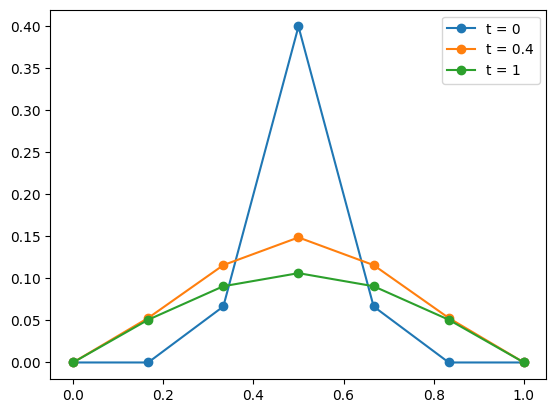

In [16]:
# set up initial conditions
v = 0.05
x = np.linspace(0, 1, 7)
t = np.linspace(0, 1, 11)
k = 0.1
h = 1/6

# set up f_x
f_x = lambda x: 2*np.max(((0.2 - np.abs(x - 0.5)), 0))
U_0 = np.array([f_x(x_i) for x_i in x])

plt.plot(x, U_0, '-o', label= "t = 0")

# let A be an n x n matrix
n = len(x)
A = np.zeros((n, n))
A[0, 0] = 1
A[n-1, n-1] = 1
lmda = v*k/(h**2)

# set up U
for i in range(1, n-1):
    A[i, i-1] = lmda
    A[i, i] = 1 - 2*lmda
    A[i, i+1] = lmda

for i in range(len(t)):
    U_0 = np.dot(A, U_0)
    if i == 4:
        plt.plot(x, U_0, '-o', label= "t = 0.4")
    if i == 9:
        plt.plot(x, U_0, '-o', label= "t = 1")
plt.legend()
plt.show()


# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


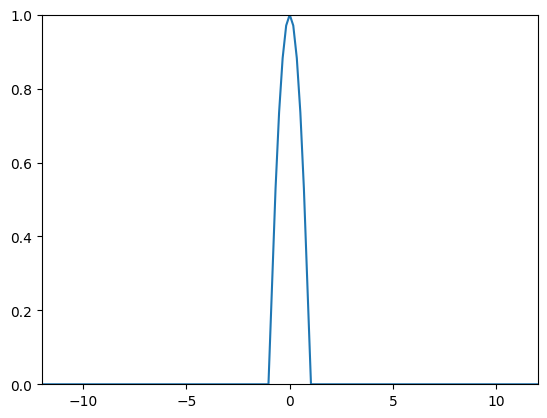

In [36]:
nx = 140
nt = 70
x = np.linspace(-12, 12, nx + 1)
t = np.linspace(0, 1, nt + 1)
k = 1/nt
h = 24/nx

# set up f_x
f_x = lambda x: np.max((1 - x**2, 0))

U_0 = np.array([f_x(x_i) for x_i in x])

# let A be an n x n matrix
n = len(x)
A = np.zeros((n, n))
A[0, 0] = 1
A[n-1, n-1] = 1
lmda = k/(h**2)

# set up U
for i in range(1, n-1):
    A[i, i-1] = lmda
    A[i, i] = 1 - 2*lmda
    A[i, i+1] = lmda

u = [U_0]
for i in range(len(t)):
    U_0 = np.dot(A, U_0)
    u.append(U_0)

# animate the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((x[0], x[-1]))
ax.set_ylim((0, 1))
wave, = wave, = plt.plot(x, u[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(x, u[i])

ani = animation.FuncAnimation(fig, update, frames=range(70), interval=25)
ani.save("heat_equation1.mp4")


`<video src="heat_equation1.mp4" controls>`

<video src="heat_equation1.mp4" controls>

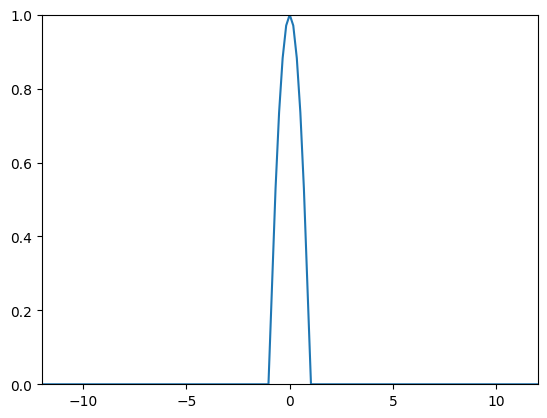

In [37]:

nx = 140
nt = 66
x = np.linspace(-12, 12, nx + 1)
t = np.linspace(0, 1, nt + 1)
k = 1/nt
h = 24/nx

# set up f_x
f_x = lambda x: np.max((1 - x**2, 0))

U_0 = np.array([f_x(x_i) for x_i in x])

# let A be an n x n matrix
n = len(x)
A = np.zeros((n, n))
A[0, 0] = 1
A[n-1, n-1] = 1
lmda = k/(h**2)

# set up U
for i in range(1, n-1):
    A[i, i-1] = lmda
    A[i, i] = 1 - 2*lmda
    A[i, i+1] = lmda

u = [U_0]
for i in range(len(t)):
    U_0 = np.dot(A, U_0)
    u.append(U_0)

# animate the figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((x[0], x[-1]))
ax.set_ylim((0, 1))
wave, = wave, = plt.plot(x, u[0])

#update function so that animation moves with time
def update(i):
    wave.set_data(x, u[i])

ani = animation.FuncAnimation(fig, update, frames=range(66), interval=25)
ani.save("heat_equation2.mp4")


`<video src="heat_equation2.mp4" controls>`

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

In [49]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    x = np.linspace(xbounds[0], xbounds[1], xsteps + 1)
    t = np.linspace(tbounds[0], tbounds[1], tsteps + 1)
    k = 1/tsteps
    h = (xbounds[1]-xbounds[0])/xsteps

    U_0 = np.array([f(x_i) for x_i in x])

    xsteps = len(x)
    # let A be an n x n matrix
    A = np.zeros((xsteps, xsteps))
    A[0, 0] = 1
    A[xsteps-1, xsteps-1] = 1
    lmda = nu*k/(h**2)

    # set up A
    for i in range(1, xsteps-1):
        A[i, i-1] = lmda
        A[i, i] = 1 - 2*lmda
        A[i, i+1] = lmda
    
    # set up B
    B = np.zeros((xsteps, xsteps))
    B[0, 0] = 1
    B[xsteps-1, xsteps-1] = 1

    for i in range(1, xsteps-1):
        B[i, i-1] = -lmda
        B[i, i] = 1 + 2*lmda
        B[i, i+1] = -lmda

    for i in range(tsteps):
        U_0 = spla.spsolve(B, np.dot(A, U_0))
        
    return U_0

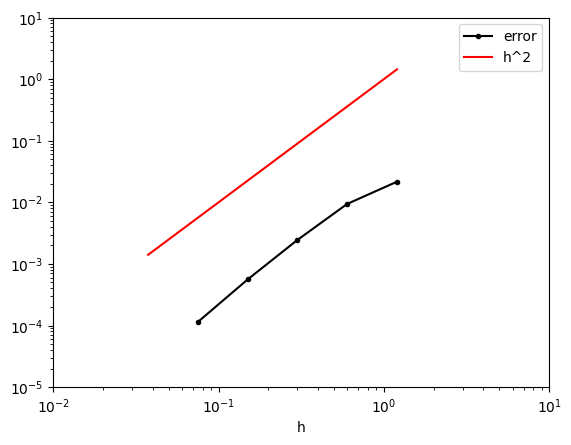

In [58]:
# for tstep, xstep in 20, 40, 80, 160, 320, and 640, plot the error in the solution
# as a function of the time step size h = 1/xstep

# set up initial conditions
nu = 1
f = lambda x: np.max((1 - x**2, 0))
xbounds = [-12, 12]
tbounds = [0, 1]
steps = [20, 40, 80, 160, 320, 640]
sols = []
for step in steps:
    U_1 = heat_cn(nu, f, xbounds, tbounds, step, step)
    sols.append(U_1)

inc = 640 // 20
true_sol = sols[-1][::inc]
errors = []

for i in range(len(steps)):
    ind = steps[i] // steps[0]
    curr_sol = sols[i][::ind]
    error = np.linalg.norm(true_sol - curr_sol, ord=np.inf)
    errors.append(error)

h = np.array([24 / step for step in steps])

# plot h**2 and errors on log scale
plt.loglog(h[:-1], errors[:-1], 'k.-', label='error')
plt.loglog(h, h**2, 'r', label='h^2')
plt.xlabel('h')
plt.ylim((1e-5, 1e1))
plt.xlim(10**(-2), 10**(1))
plt.legend()
plt.show()